In [1]:
!pwd

/content


In [2]:
#changing the working directory and entering to dataset directory for my google drive
%cd drive/MyDrive/kaggle/image_classification/

/content/drive/MyDrive/kaggle/image_classification


In [3]:
%cd Cotton_Disease/

/content/drive/My Drive/kaggle/image_classification/Cotton_Disease


In [4]:
!ls

model_rcat_dog.h5  test  train	val


In [36]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [37]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [38]:
train_path = 'train'
valid_path = 'test'

In [39]:
# add preprocessing layer to the front of DenseNet201
densenet = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
# don't train existing weights
for layer in densenet.layers:
  layer.trainable = False

In [41]:
# useful for getting number of classes
folders = glob('train/*')

In [42]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [43]:
# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [44]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [45]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [47]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [48]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [49]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
61/61 [==============================] - 48s 651ms/step - loss: 0.7631 - accuracy: 0.8590 - val_loss: 0.2211 - val_accuracy: 0.9528
Epoch 2/4
61/61 [==============================] - 37s 601ms/step - loss: 0.3304 - accuracy: 0.9344 - val_loss: 0.0251 - val_accuracy: 0.9811
Epoch 3/4
61/61 [==============================] - 36s 593ms/step - loss: 0.3123 - accuracy: 0.9426 - val_loss: 0.3827 - val_accuracy: 0.9434
Epoch 4/4
61/61 [==============================] - 36s 596ms/step - loss: 0.2862 - accuracy: 0.9549 - val_loss: 0.0675 - val_accuracy: 0.9906


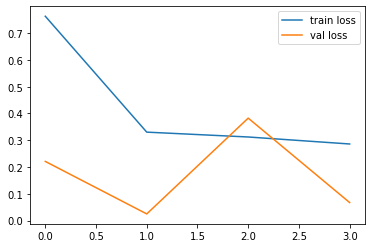

<Figure size 432x288 with 0 Axes>

In [50]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

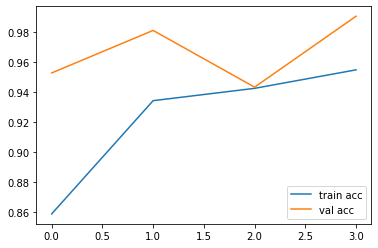

<Figure size 432x288 with 0 Axes>

In [51]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')